## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [11]:
import pandas as pd
df = pd.read_csv("QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [12]:
df.tail()

,DATE,TAG,POSTS
2491,2023-07-01 00:00:00,php,2080
2492,2023-07-01 00:00:00,python,12475
2493,2023-07-01 00:00:00,r,2480
2494,2023-07-01 00:00:00,ruby,236
2495,2023-07-01 00:00:00,swift,1251


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [13]:
df.shape

(2496, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
df.count()

DATE     2496
TAG      2496
POSTS    2496
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [29]:
df.groupby("TAG").sum()

/var/folders/_j/5p48krrn6lx6tnvsyf6p97280000gn/T/ipykernel_1414/3129636002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,43080
c,398081
c#,1597946
c++,797051
delphi,51109
go,70114
java,1902718
javascript,2505039
perl,67761


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [30]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,180,180
c,180,180
c#,181,181
c++,180,180
delphi,180,180
go,165,165
java,180,180
javascript,180,180
perl,180,180


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [36]:
df.dropna()
pd.to_datetime(df.DATE[1])

Timestamp('2008-08-01 00:00:00')

In [39]:
# Converting entire column
df.DATE = pd.to_datetime(df.DATE, yearfirst=True)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [40]:
df.dropna()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164
...,...,...,...
2491,2023-07-01,php,2080
2492,2023-07-01,python,12475
2493,2023-07-01,r,2480
2494,2023-07-01,ruby,236


## Data Manipulation



In [41]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,180.0,1265.0,4909.0,2572.0,143.0,639.0,5538.0,10538.0,95.0,2282.0,15556.0,3831.0,301.0,1367.0
2023-04-01,197.0,1188.0,3849.0,1967.0,121.0,516.0,4496.0,8312.0,56.0,1941.0,12452.0,3106.0,220.0,1097.0
2023-05-01,176.0,1051.0,3848.0,1784.0,114.0,426.0,4199.0,7808.0,54.0,1976.0,11831.0,2866.0,256.0,1002.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [42]:
reshaped_df.shape

(181, 14)

In [43]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [44]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [59]:
reshaped_df["swift"].count()

172

In [66]:
df_no_nan = reshaped_df.dropna()

In [64]:
reshaped_df["c#"].count()

181

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [67]:
df_no_nan.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2009-11-01,82.0,956.0,4676.0,1746.0,274.0,65.0,2759.0,2234.0,322.0,2676.0,1552.0,94.0,654.0,3.0
2009-12-01,62.0,849.0,4483.0,1652.0,282.0,11.0,2685.0,2305.0,261.0,2817.0,1584.0,80.0,572.0,1.0
2010-02-01,69.0,1033.0,5093.0,2275.0,283.0,7.0,3575.0,2638.0,347.0,3157.0,1861.0,122.0,688.0,2.0
2010-03-01,123.0,1113.0,6027.0,2433.0,317.0,8.0,4437.0,2989.0,390.0,3735.0,2069.0,139.0,693.0,1.0
2010-04-01,124.0,1181.0,5773.0,2489.0,271.0,10.0,3876.0,3012.0,364.0,3635.0,1806.0,160.0,752.0,2.0


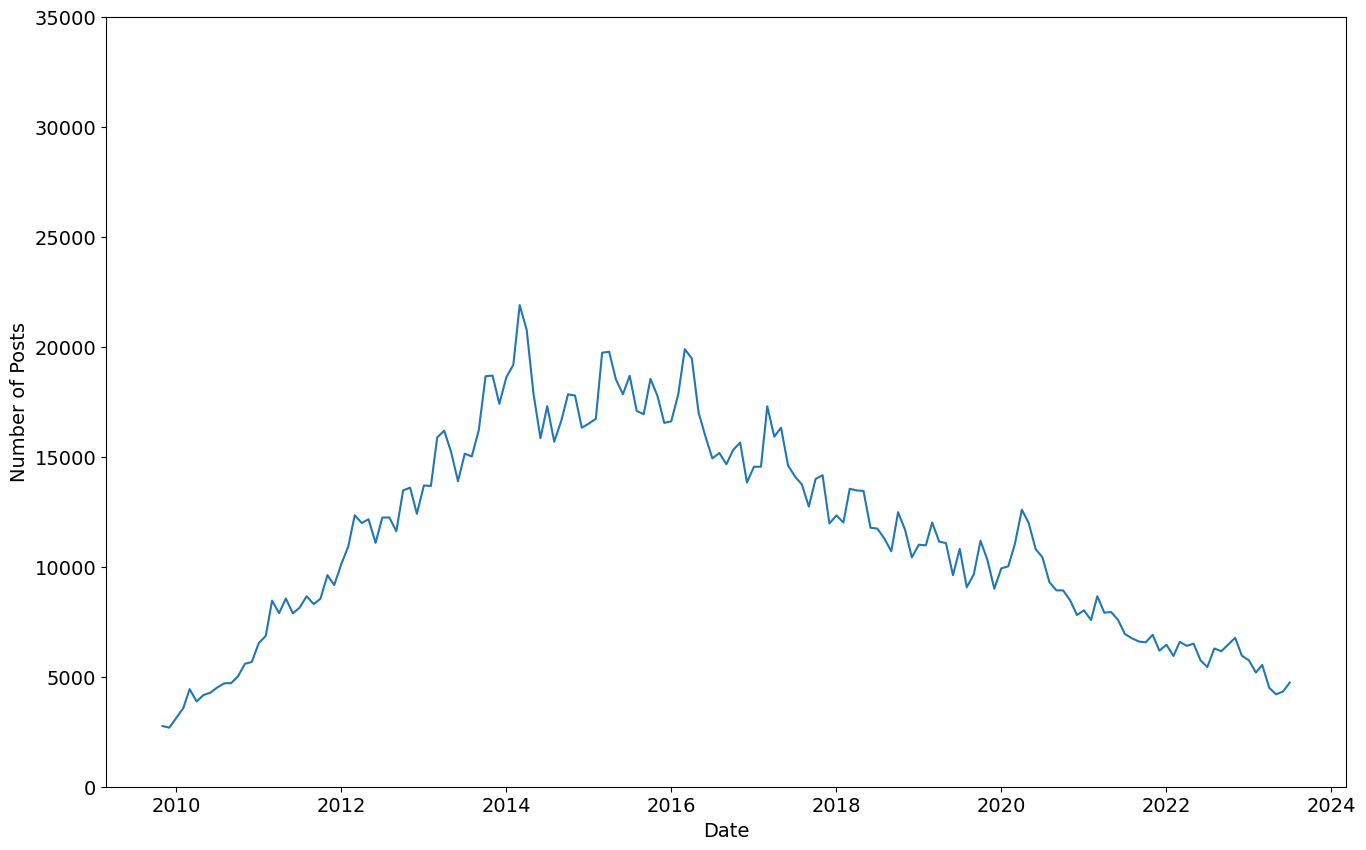

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(df_no_nan.index, df_no_nan.java)

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

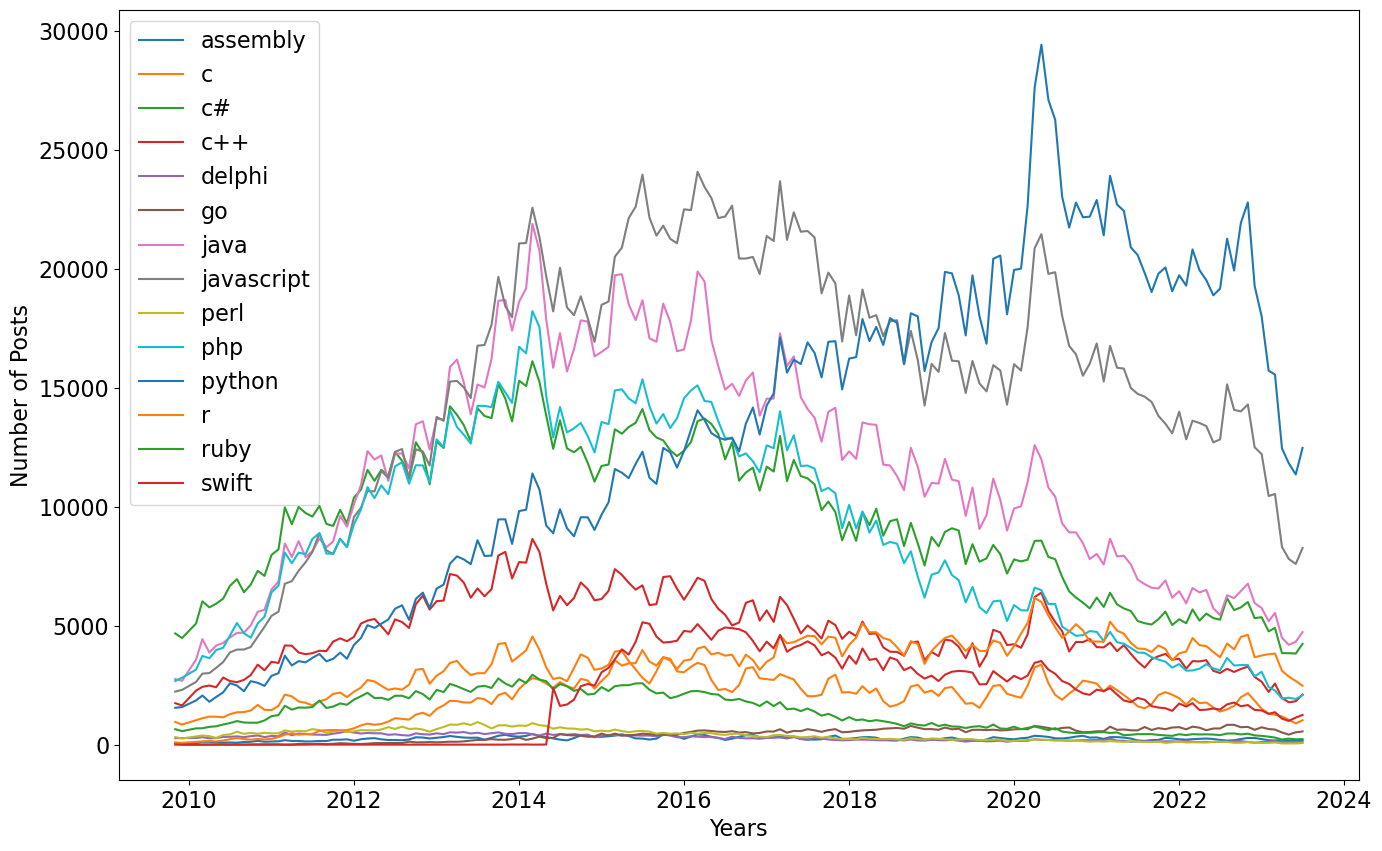

In [107]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
# Plot all
plt.plot(df_no_nan.index, df_no_nan)
# Add legends
plt.legend(df_no_nan.columns, fontsize=16)

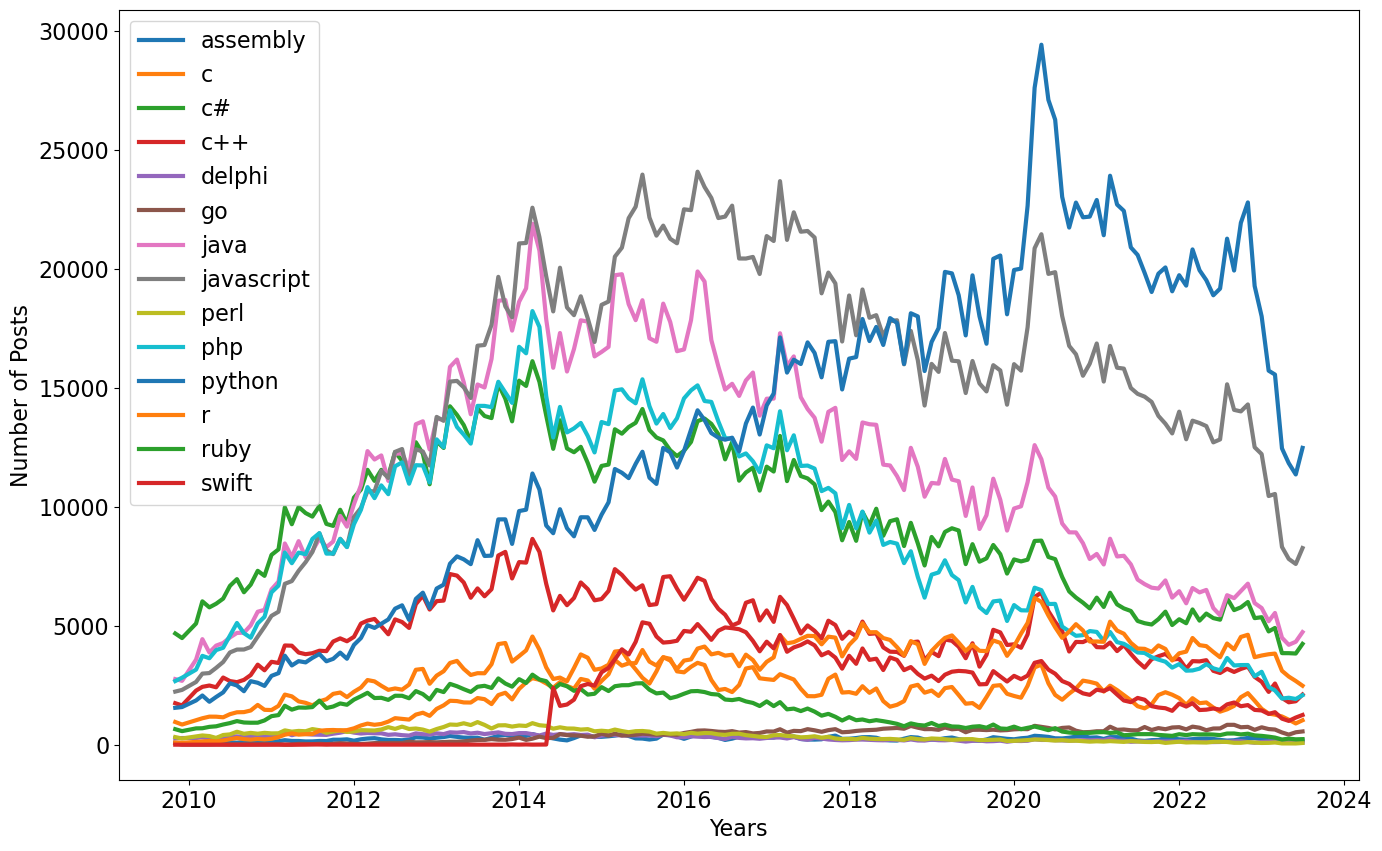

In [110]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
for column in df_no_nan.columns:
    plt.plot(df_no_nan.index, df_no_nan[column], linewidth=3)
plt.legend(df_no_nan.columns, fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [111]:
roll_df = df_no_nan.rolling(window=6).mean()

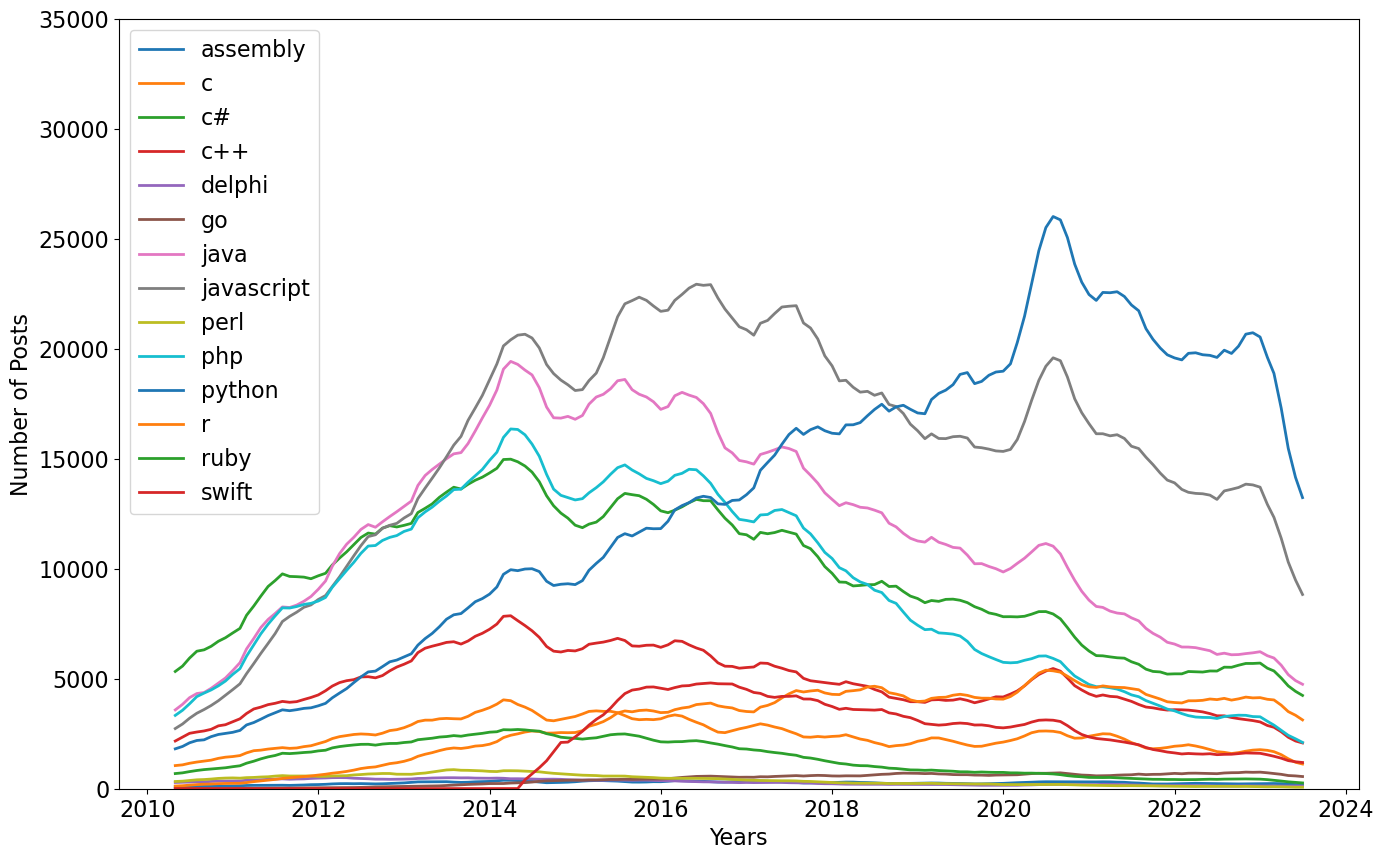

In [115]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
plt.ylim(0, 35000)
plt.plot(roll_df.index, roll_df, linewidth=2)
plt.legend(roll_df.columns, fontsize=16)

In [116]:
roll_df = df_no_nan.rolling(window=12).mean()

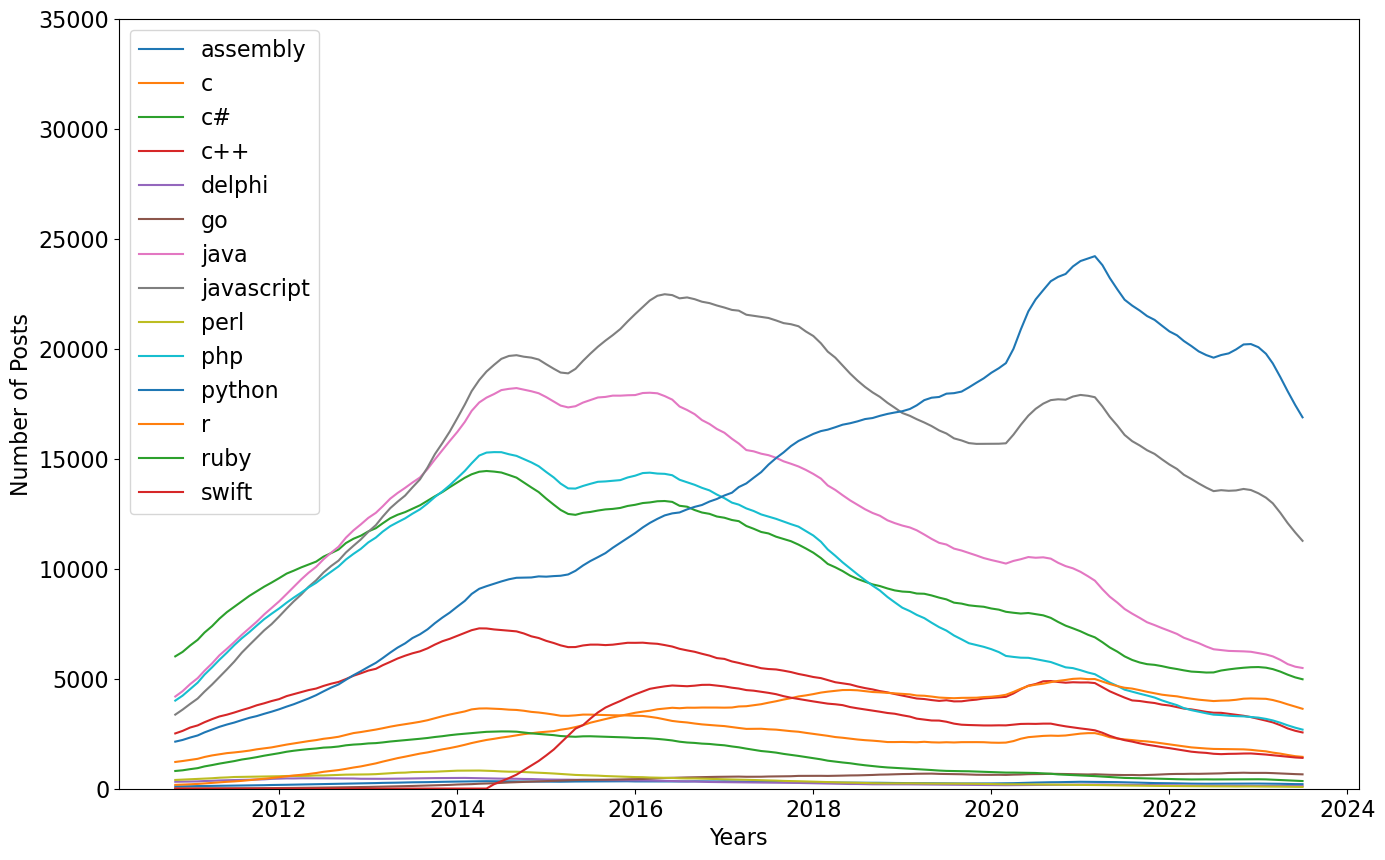

In [117]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Number of Posts", fontsize=16)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column])
plt.legend(roll_df.columns, fontsize=16)